In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 17:10:20 2020

@author: Tagore pothuneedi 
@Used code: PJ
"""

import matplotlib.pyplot as plt #to plot required plots
from skimage.transform import resize #to resize image 
from skimage.util import pad #to pad values in numpy array
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os #to get paths of images
import cv2 #to read images
from sklearn.decomposition import PCA
scores={}


#function used to show the image
def show_image(image_path,title='Image',cmap_type='gray'):
    img_grey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_grey,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# function to get all file paths from provided directory
def get_list_of_files(dir_path):
    # create a list of file and sub directories 
    # names in the given directory 
    files = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for file in files:
        # Create full path
        fullPath = os.path.join(dir_path, file)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            all_files = all_files + get_list_of_files(fullPath)
        else:
            all_files.append(fullPath)
                
    return all_files

#function to get folder names from provided path : folder name is later used as target label
def get_folder_name_list(dir_path):
   base_path_folder_list=[]
   for entry in os.listdir(dir_path):
       if os.path.isdir(os.path.join(dir_path, entry)):
           base_path_folder_list.append(entry) 
   return base_path_folder_list

#white padding : padwithone black padding:pad with zero
#used in preprocessing of image, for adding 2 pixel border from all sides
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

def pre_process_image(img_path):
    #show_image(img_path,'greyimg')
    img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
        
    # define a threshold, 128 is the middle of black and white in grey scale
    thresh = 128
    
    # threshold the image
    img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
    
    #invert the binary image to get clear image
    inverted_binary_image =  cv2.bitwise_not(img_binary)
    fimg = np.where(inverted_binary_image>0,1,inverted_binary_image)
    
    
    '''
    # can be used when image is not 32 * 32 pixel 
    resized_img = resize(inverted_binary_image,(32,32),anti_aliasing=False) # second parameter : scale here 2 double the size
    resized_img_with_padding = pad(resized_img,2,padwithzeros)
    fimg = np.where(resized_img_with_padding>0,1,resized_img_with_padding)
    '''
    #normalized_fimg = fimg / np.linalg.norm(fimg)
    normalized_fimg = fimg 
    
    #filters
    #sobelx = cv2.Sobel(fimg,cv2.CV_64F,1,0,ksize=5)
    #sobely = cv2.Sobel(fimg,cv2.CV_64F,0,1,ksize=5)
    #laplacian = cv2.Laplacian(fimg,cv2.CV_64F)
    
    return normalized_fimg.flatten()

#get list of preprocessed images
def load_images_list(img_paths):
    images=[]
    for img_path in img_paths:
        fimg = pre_process_image(img_path)
        images.append(fimg)
    return images

# base path for dataset
base_path=r"C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Train"



#base_path_folder_list = get_folder_name_list(base_path)    
#print(base_path_folder_list)


#base_path_folder_list=['character_1_ka','character_2_kha','character_3_ga','character_4_gha','character_5_kna']
base_path_folder_list=['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

df = pd.DataFrame()
i=0
for folder_name in base_path_folder_list:
    img_path=base_path+'/'+folder_name+'/'
    images_path_list = get_list_of_files(img_path)
    images_flattened = load_images_list(images_path_list)
    df_images = pd.DataFrame(images_flattened)
    df_images['label'] = i
    i+=1
    
    ##subdivide
    ##astract
    
    df=df.append(df_images,ignore_index=True)
    

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#shuffle records in df
df = df.sample(frac = 1) 
X=df.iloc[:,df.columns != 'label']
y=df['label']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=1111,stratify=y)


##################################################################################
#target_names=['character_1_ka','character_2_kha','character_3_ga']
target_names=base_path_folder_list.copy()


#testing random image
test_base_path = r'C:\Users\tagor\Desktop\ml\DevanagariHandwrittenCharacterDataset\Test'
test_img_path=test_base_path+'digit_7/5771.png'


def test_char(img_path):
    test_img = pre_process_image(img_path)
    test_img=test_img.reshape(1,-1)
    print("rfc: {0}".format(rfc.predict(test_img)))

    

In [2]:

##################
#CNN 
##################
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from keras.layers.core import Activation
import keras.backend as K


In [3]:
X_train.shape,X.shape

((13600, 1024), (17000, 1024))

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32,32

# the data, split between train and test sets

x_train = np.asarray(X_train).reshape(13600,32,32,1)
x_test = np.asarray(X_test).reshape(3400,32,32,1)

#x_train = X_train
#x_test = X_test

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (13600, 32, 32, 1)
13600 train samples
3400 test samples


In [5]:
from keras.backend import sigmoid,tanh,exp
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

def param_tanh(x):
    return x*tanh(x)
def relu_moid(x):
    #if x > 0.0:
    #    return x
    #else:
    #    return 1/1+exp(-x)

    return K.switch(x>0,x,sigmoid(x))

def param_sigmoid(x):
    return x/(1+exp(-x))
    #print(x)
    
get_custom_objects().update({'param_tanh': Activation(param_tanh)})
get_custom_objects().update({'relu_moid': Activation(relu_moid)})
get_custom_objects().update({'param_sigmoid': Activation(param_sigmoid)})

# Relu_moid

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu_moid',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu_moid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu_moid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [7]:
#optimizer=keras.optimizers.Adadelta(),
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((3400, 32, 32, 1), (3400, 10), (13600, 32, 32, 1), (13600, 10))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['relu_moid']=[]
scores['relu_moid'].append(score[1])
scores['relu_moid'].append(score[2])
scores['relu_moid'].append(score[3])
scores['relu_moid'].append(score[4])

Epoch 1/12
107/107 [==============================] - 17s 160ms/step - loss: 2.5431 - accuracy: 0.0000e+00 - precision: 0.1010 - recall: 0.0036 - auc: 0.4992 - val_loss: 2.3024 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/12
107/107 [==============================] - 17s 160ms/step - loss: 2.3018 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5039 - val_loss: 2.3008 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5128
Epoch 3/12
107/107 [==============================] - 17s 160ms/step - loss: 2.2903 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5129 - val_loss: 2.2107 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6142
Epoch 4/12
107/107 [==============================] - 17s 159ms/step - loss: 2.1388 - accuracy: 0.0000e+00 - precision: 0.8919 - recall: 0.0097 - auc: 0.6257 -

# param_tanh

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='param_tanh',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='param_tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='param_tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['param_tanh']=[]
scores['param_tanh'].append(score[1])
scores['param_tanh'].append(score[2])
scores['param_tanh'].append(score[3])
scores['param_tanh'].append(score[4])

Epoch 1/12
107/107 [==============================] - 17s 163ms/step - loss: 0.6236 - accuracy: 1.4706e-05 - precision: 0.9074 - recall: 0.7237 - auc: 0.9765 - val_loss: 0.0903 - val_accuracy: 0.0000e+00 - val_precision: 0.9765 - val_recall: 0.9653 - val_auc: 0.9992
Epoch 2/12
107/107 [==============================] - 17s 157ms/step - loss: 0.1196 - accuracy: 3.0147e-04 - precision: 0.9680 - recall: 0.9552 - auc: 0.9985 - val_loss: 0.0522 - val_accuracy: 0.0000e+00 - val_precision: 0.9879 - val_recall: 0.9806 - val_auc: 0.9995
Epoch 3/12
107/107 [==============================] - 17s 158ms/step - loss: 0.0852 - accuracy: 8.8235e-04 - precision: 0.9786 - recall: 0.9701 - auc: 0.9991 - val_loss: 0.0375 - val_accuracy: 0.0000e+00 - val_precision: 0.9900 - val_recall: 0.9862 - val_auc: 0.9996
Epoch 4/12
107/107 [==============================] - 17s 159ms/step - loss: 0.0682 - accuracy: 0.0018 - precision: 0.9818 - recall: 0.9746 - auc: 0.9995 - val_loss: 0.0361 - val_accuracy: 0.0000e+00

# param_sigmoid

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='param_sigmoid',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='param_sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='param_sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['param_sigmoid']=[]
scores['param_sigmoid'].append(score[1])
scores['param_sigmoid'].append(score[2])
scores['param_sigmoid'].append(score[3])
scores['param_sigmoid'].append(score[4])

Epoch 1/12
107/107 [==============================] - 19s 179ms/step - loss: 0.4654 - accuracy: 2.9412e-05 - precision: 0.9212 - recall: 0.7929 - auc: 0.9867 - val_loss: 0.1334 - val_accuracy: 0.0000e+00 - val_precision: 0.9666 - val_recall: 0.9532 - val_auc: 0.9985
Epoch 2/12
107/107 [==============================] - 19s 174ms/step - loss: 0.1419 - accuracy: 8.9706e-04 - precision: 0.9623 - recall: 0.9486 - auc: 0.9978 - val_loss: 0.0850 - val_accuracy: 5.8824e-05 - val_precision: 0.9789 - val_recall: 0.9706 - val_auc: 0.9990
Epoch 3/12
107/107 [==============================] - 19s 174ms/step - loss: 0.0940 - accuracy: 0.0020 - precision: 0.9740 - recall: 0.9653 - auc: 0.9989 - val_loss: 0.0608 - val_accuracy: 0.0016 - val_precision: 0.9837 - val_recall: 0.9788 - val_auc: 0.9992
Epoch 4/12
107/107 [==============================] - 18s 172ms/step - loss: 0.0640 - accuracy: 0.0064 - precision: 0.9834 - recall: 0.9782 - auc: 0.9991 - val_loss: 0.0480 - val_accuracy: 0.0039 - val_preci

# Relu

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['relu']=[]
scores['relu'].append(score[1])
scores['relu'].append(score[2])
scores['relu'].append(score[3])
scores['relu'].append(score[4])

Epoch 1/12
107/107 [==============================] - 14s 133ms/step - loss: 0.5401 - accuracy: 5.8824e-05 - precision: 0.9112 - recall: 0.7496 - auc: 0.9832 - val_loss: 0.1216 - val_accuracy: 0.0000e+00 - val_precision: 0.9686 - val_recall: 0.9541 - val_auc: 0.9987
Epoch 2/12
107/107 [==============================] - 13s 125ms/step - loss: 0.1547 - accuracy: 8.8971e-04 - precision: 0.9617 - recall: 0.9414 - auc: 0.9979 - val_loss: 0.0582 - val_accuracy: 1.1765e-04 - val_precision: 0.9861 - val_recall: 0.9803 - val_auc: 0.9994
Epoch 3/12
107/107 [==============================] - 13s 124ms/step - loss: 0.1007 - accuracy: 0.0033 - precision: 0.9742 - recall: 0.9618 - auc: 0.9990 - val_loss: 0.0455 - val_accuracy: 0.0061 - val_precision: 0.9888 - val_recall: 0.9838 - val_auc: 0.9991
Epoch 4/12
107/107 [==============================] - 13s 125ms/step - loss: 0.0739 - accuracy: 0.0075 - precision: 0.9809 - recall: 0.9738 - auc: 0.9993 - val_loss: 0.0361 - val_accuracy: 0.0096 - val_preci

# tanh

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='tanh',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['tanh']=[]
scores['tanh'].append(score[1])
scores['tanh'].append(score[2])
scores['tanh'].append(score[3])
scores['tanh'].append(score[4])

Epoch 1/12
107/107 [==============================] - 13s 126ms/step - loss: 0.4779 - accuracy: 0.0000e+00 - precision: 0.9075 - recall: 0.8155 - auc: 0.9837 - val_loss: 0.1668 - val_accuracy: 0.0000e+00 - val_precision: 0.9608 - val_recall: 0.9376 - val_auc: 0.9981
Epoch 2/12
107/107 [==============================] - 13s 123ms/step - loss: 0.1739 - accuracy: 0.0000e+00 - precision: 0.9598 - recall: 0.9374 - auc: 0.9972 - val_loss: 0.1206 - val_accuracy: 0.0000e+00 - val_precision: 0.9684 - val_recall: 0.9550 - val_auc: 0.9989
Epoch 3/12
107/107 [==============================] - 13s 124ms/step - loss: 0.1238 - accuracy: 0.0000e+00 - precision: 0.9706 - recall: 0.9551 - auc: 0.9983 - val_loss: 0.0975 - val_accuracy: 0.0000e+00 - val_precision: 0.9765 - val_recall: 0.9653 - val_auc: 0.9992
Epoch 4/12
107/107 [==============================] - 13s 125ms/step - loss: 0.0937 - accuracy: 0.0000e+00 - precision: 0.9774 - recall: 0.9673 - auc: 0.9991 - val_loss: 0.0821 - val_accuracy: 0.0000

# Sigmoid

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='sigmoid',input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['Accuracy','Precision','Recall','AUC'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
scores['sigmoid']=[]
scores['sigmoid'].append(score[1])
scores['sigmoid'].append(score[2])
scores['sigmoid'].append(score[3])
scores['sigmoid'].append(score[4])

Epoch 1/12
107/107 [==============================] - 14s 135ms/step - loss: 2.7427 - accuracy: 0.0000e+00 - precision: 0.0764 - recall: 0.0032 - auc: 0.4989 - val_loss: 2.3067 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/12
107/107 [==============================] - 13s 125ms/step - loss: 2.4549 - accuracy: 0.0000e+00 - precision: 0.1250 - recall: 7.3529e-05 - auc: 0.4995 - val_loss: 2.3059 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/12
107/107 [==============================] - 14s 127ms/step - loss: 2.4088 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4963 - val_loss: 2.3044 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/12
107/107 [==============================] - 14s 126ms/step - loss: 2.3652 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.50

In [31]:

activation=list(scores.keys())
metrics=list(scores.values())

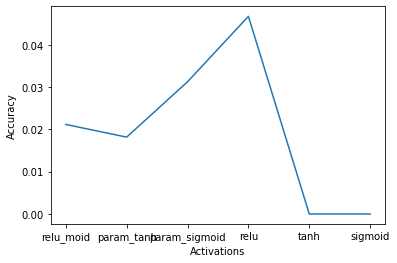

In [36]:
import seaborn as sns
ax=sns.lineplot(x=activation,y=[item[0] for item in metrics])
ax.set(xlabel='Activations', ylabel='Accuracy')
plt.show()

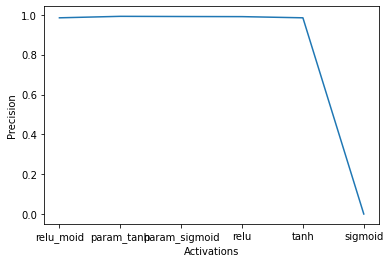

In [38]:
ax=sns.lineplot(x=activation,y=[item[1] for item in metrics])
ax.set(xlabel='Activations', ylabel='Precision')
plt.show()

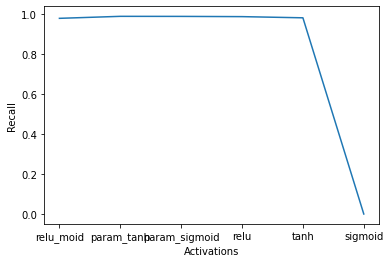

In [39]:
ax=sns.lineplot(x=activation,y=[item[2] for item in metrics])
ax.set(xlabel='Activations', ylabel='Recall')
plt.show()

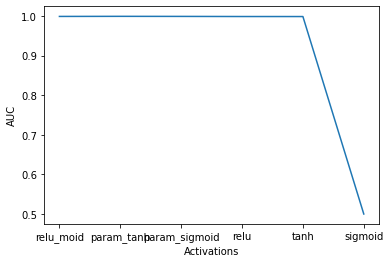

In [40]:
ax=sns.lineplot(x=activation,y=[item[3] for item in metrics])
ax.set(xlabel='Activations', ylabel='AUC')
plt.show()

In [41]:
metrics

[[0.021176470443606377,
  0.9852158427238464,
  0.9800000190734863,
  0.9992630481719971],
 [0.018176469951868057,
  0.9926275610923767,
  0.9900000095367432,
  0.9994951486587524],
 [0.03126470744609833,
  0.9917477369308472,
  0.9897058606147766,
  0.9993206262588501],
 [0.04673529416322708,
  0.9911530613899231,
  0.9885293841362,
  0.9990370273590088],
 [0.0, 0.9852550625801086, 0.9826470613479614, 0.9989621639251709],
 [0.0, 0.0, 0.0, 0.5]]